# Graph Quality Classifier Using CNN

This project demonstrates an end-to-end pipeline for classifying graphs generated by forecasting systems into four categories:
- **Good**
- **Passable**
- **Bad**
- **None** (non-forecast)

It involves:
- Generating synthetic graphs for each class using `matplotlib`
- Training a convolutional neural network (MobileNetV2 backbone)
- Saving and using the trained model for live classification from memory (`BytesIO`)


## Dataset Overview

The dataset is auto-generated using the script `data.py`, which creates:
- 70 images each for `good`, `passable`, `bad`
- 50 images for `none` (random chart types)

The total dataset is stored under the folder: `graph_classifier_dataset_final`.


## Model Architecture and Training

We use **MobileNetV2** as the feature extractor (transfer learning), followed by:
- Global Average Pooling
- Dense Layer with Dropout
- Final classification layer with softmax activation for 4 classes


In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam


In [ ]:
dataset_path = r'graph_classifier_dataset_final'
img_size = (128, 128)
batch_size = 8

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

class_names = list(train_gen.class_indices.keys())
print("Class labels:", class_names)


Found 209 images belonging to 4 classes.
Found 52 images belonging to 4 classes.
Class labels: ['bad', 'good', 'none', 'passable']


Found 209 images belonging to 4 classes.
Found 52 images belonging to 4 classes.
Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - accuracy: 0.5669 - loss: 1.1922 - val_accuracy: 1.0000 - val_loss: 0.1045
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.8495 - loss: 0.3802 - val_accuracy: 1.0000 - val_loss: 0.0433
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.8545 - loss: 0.2944 - val_accuracy: 1.0000 - val_loss: 0.0282
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.9615 - loss: 0.1510 - val_accuracy: 1.0000 - val_loss: 0.0145
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.9480 - loss: 0.1692 - val_accuracy: 1.0000 - val_loss: 0.0162
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.9471 - loss: 0.1471 - val_accuracy: 1.0000 - val_loss: 0.0095
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.9718 - loss: 0.0984 - val_accuracy: 1.0000 - val_loss: 0.0064
Epoch 8/10
27/27 ━━━━━━━━━━━━

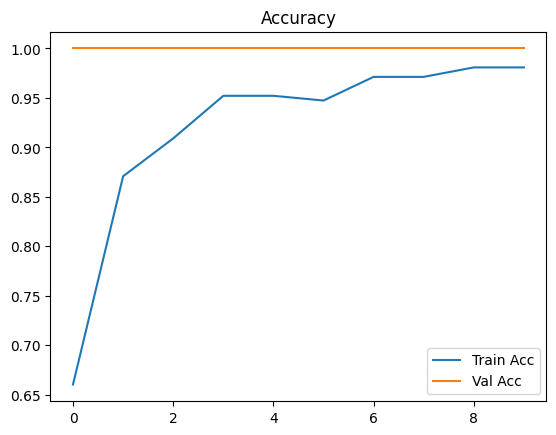

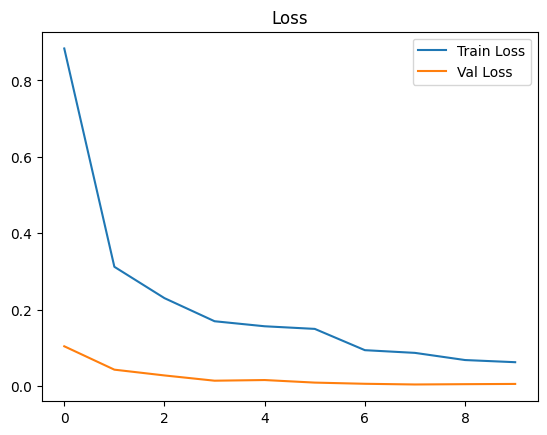

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# 1. Dataset path & parameters
dataset_path = r'graph_classifier_dataset_final'
img_size = (128, 128)
batch_size = 8

# 2. Data generators
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# 3. Model architecture
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(4, activation='softmax')  # 4 classes
])

model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 4. Train
history = model.fit(train_gen, validation_data=val_gen, epochs=10)

# 5. Save model
model.save("graph_quality_final_model.h5")

# 6. Plot
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()


In [18]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime


In [ ]:
store = r"retail_store_inventory.csv"
df=pd.read_csv(store)

#show basic information about the data set
df.info()

#Display first 5 rows to understand data structre
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [20]:
print(df.isnull().sum())

df['Date'] = pd.to_datetime(df['Date']) # Check date range

print("Date Range: ", df['Date'].min(),"to",df['Date'].max())


Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64
Date Range:  2022-01-01 00:00:00 to 2024-01-01 00:00:00


In [21]:
df['Date'] = pd.to_datetime(df['Date'])

df['YearMonth'] = df['Date'].dt.to_period('M')

monthly_demand = df.groupby(['YearMonth','Region'])['Demand Forecast'].sum().reset_index()

monthly_demand['YearMonth'] = monthly_demand['YearMonth'].dt.to_timestamp()

monthly_demand.head()

,YearMonth,Region,Demand Forecast
0,2022-01-01,East,105394.37
1,2022-01-01,North,115111.02
2,2022-01-01,South,102043.45
3,2022-01-01,West,113040.88
4,2022-02-01,East,98121.36


In [22]:
# Show min and max dates in the grouped monthly data
print("Earliest record:", monthly_demand['YearMonth'].min())
print("Latest record:", monthly_demand['YearMonth'].max())


Earliest record: 2022-01-01 00:00:00
Latest record: 2024-01-01 00:00:00


In [23]:
# Check which regions have data in Jan 2024
monthly_demand[monthly_demand['YearMonth'] == '2024-01-01']

,YearMonth,Region,Demand Forecast
96,2024-01-01,East,3509.75
97,2024-01-01,North,3902.22
98,2024-01-01,South,1451.60
99,2024-01-01,West,4858.93


C:\Users\saksh\AppData\Local\Temp\ipykernel_3232\3604075605.py:15: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\saksh\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


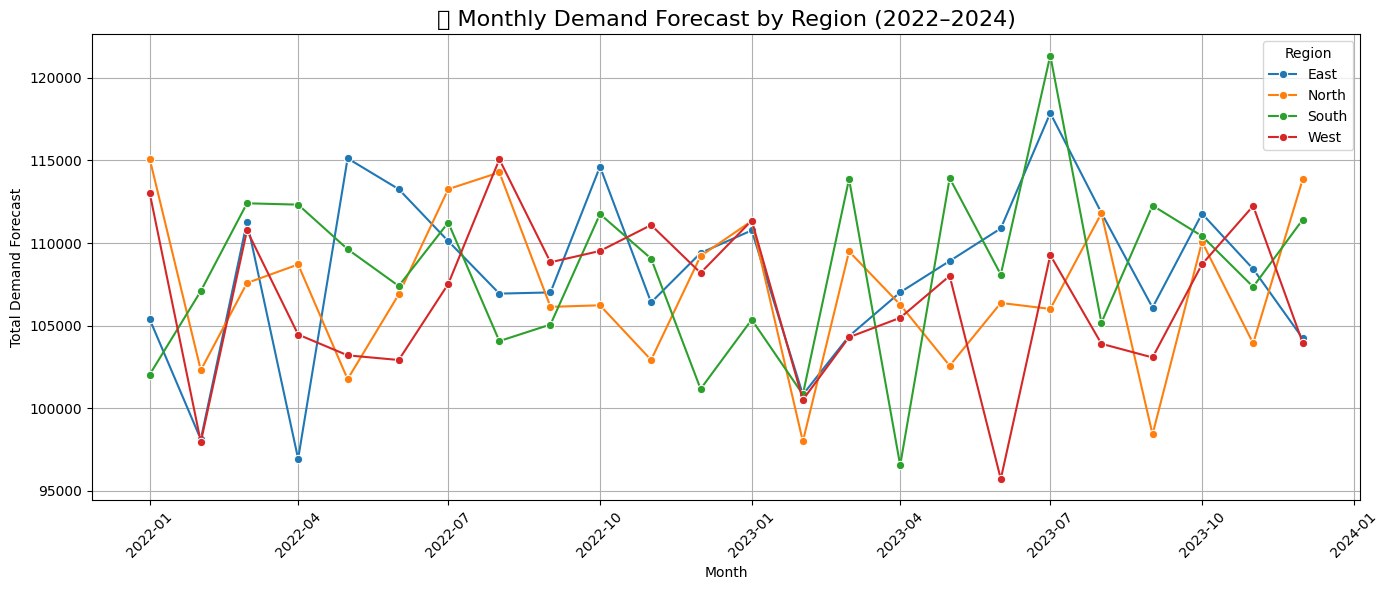

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plot_data = monthly_demand[monthly_demand['YearMonth']<'2024-01-01']
#   plotting
plt.figure(figsize=(14, 6))
sns.lineplot(data=plot_data, x='YearMonth', y='Demand Forecast', hue='Region', marker='o')

plt.title('Monthly Demand Forecast by Region (2022–2024)', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Total Demand Forecast')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Region')
plt.tight_layout()
plt.show()


In [25]:
from statsmodels.tsa.api import ExponentialSmoothing

forecast_list = []

regions = plot_data['Region'].unique()

forecast_periods = 6
future_dates = pd.date_range(start='2024-01-01', periods=forecast_periods, freq='MS')

for region in regions:
    regional_data = plot_data[plot_data['Region'] == region]
    ts = regional_data.set_index('YearMonth')['Demand Forecast']

    model = ExponentialSmoothing(ts,trend='add', seasonal='add', seasonal_periods=12)
    fitted_model=model.fit()
    forecast = fitted_model.forecast(forecast_periods)

    forecast_df = pd.DataFrame({
        'YearMonth': future_dates,
        'Region': region,
        'Demand Forecast': forecast.values
    })

    forecast_list.append(forecast_df)


forecast_df = pd.concat(forecast_list, ignore_index=True)

final_plot = pd.concat([plot_data, forecast_df])

c:\Users\saksh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\saksh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\saksh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\saksh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\saksh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWar

In [26]:
from io import BytesIO
import matplotlib.pyplot as plt

region_graphs = {}

for region in final_plot['Region'].unique():
    region_data = final_plot[final_plot['Region'] == region].copy()
    region_data['YearMonth'] = pd.to_datetime(region_data['YearMonth'])

    # Properly split using actual forecast start
    split_date = pd.to_datetime('2024-01-01')
    actual = region_data[region_data['YearMonth'] < split_date]
    forecast = region_data[region_data['YearMonth'] >= split_date]

    # Plot
    fig, ax = plt.subplots(figsize=(6, 3))
    ax.plot(actual['YearMonth'], actual['Demand Forecast'], color='blue', label='Actual')
    ax.plot(forecast['YearMonth'], forecast['Demand Forecast'], color='red', linestyle='--', label='Forecast')
    ax.legend()
    ax.set_title(f"{region} - Demand Forecast (2022–2024)")
    plt.tight_layout()

    # Save to BytesIO
    buf = BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight')
    plt.close(fig)
    buf.seek(0)

    region_graphs[region] = buf


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image
from openpyxl import Workbook
from datetime import datetime

# Load the correct model
model_path = r"graph_quality_final_model.h5"
model = load_model(model_path)
labels = ['bad', 'good', 'passable', 'none']

# Setup Excel
wb = Workbook()
ws = wb.active
ws.append(["Region", "Prediction", "Confidence", "Timestamp"])

# Predict
for region, buffer in region_graphs.items():
    img = Image.open(buffer).convert('RGB').resize((128, 128))
    x = img_to_array(img) / 255.0
    x = np.expand_dims(x, axis=0)
    pred = model.predict(x)[0]
    pred_label = labels[np.argmax(pred)]
    confidence = float(np.max(pred))
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    ws.append([region, pred_label, round(confidence, 3), timestamp])

# Save final Excel
output_path = r"final_graph_predictions.xlsx"
wb.save(output_path)
print("Excel saved at:", output_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 832ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Excel saved at: C:\Users\saksh\Desktop\Github own\Trial 2\final_graph_predictions.xlsx


C:\Users\saksh\AppData\Local\Temp\ipykernel_3232\1371375830.py:48: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\saksh\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


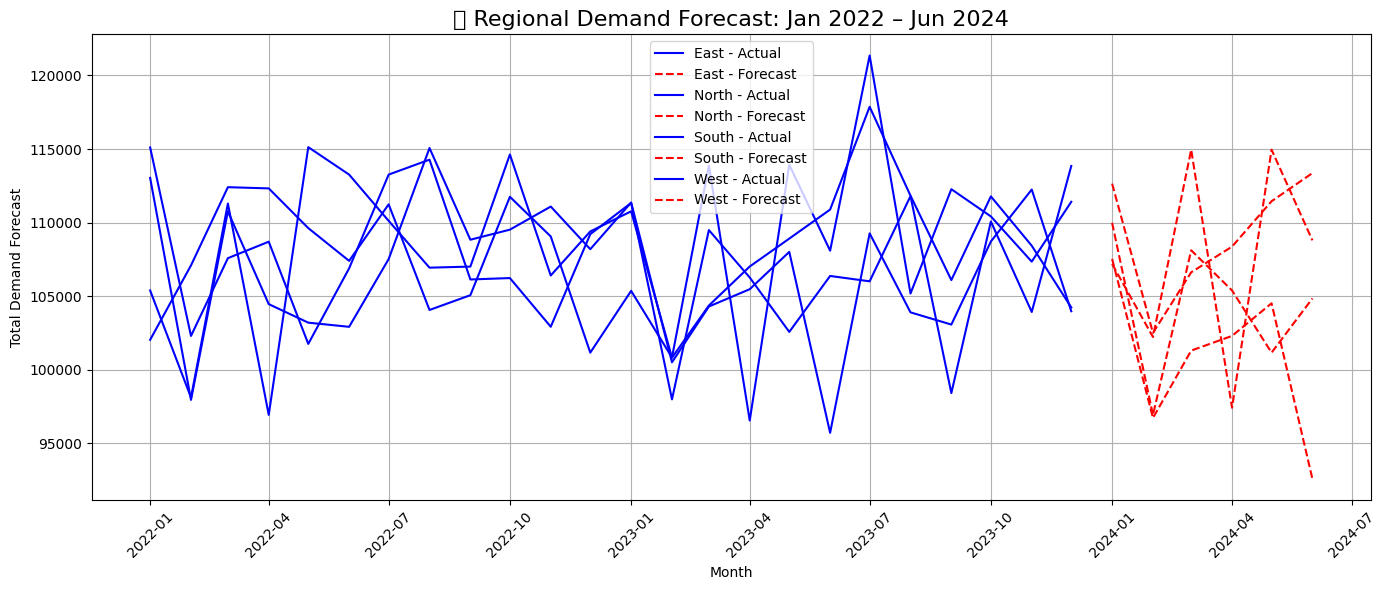

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

for region in regions:
    region_data = final_plot[final_plot['Region'] == region].copy()
    region_data['YearMonth'] = pd.to_datetime(region_data['YearMonth'])

    # Create a line style column
    region_data['Line Style'] = region_data['YearMonth'].apply(
        lambda x: 'Actual' if x < pd.to_datetime('2024-01-01') else 'Forecast'
    )

    # Sort for smoothness
    region_data.sort_values('YearMonth', inplace=True)

    # Plot continuous data with style change
    last_style = None
    buffer = []

    for idx, row in region_data.iterrows():
        if last_style is None:
            last_style = row['Line Style']
        if row['Line Style'] != last_style:
            segment = pd.DataFrame(buffer)
            plt.plot(segment['YearMonth'], segment['Demand Forecast'],
                     label=f"{region} - {last_style}",
                     linestyle='-' if last_style == 'Actual' else '--',
                     color='blue' if last_style == 'Actual' else 'red')
            buffer = []
            last_style = row['Line Style']
        buffer.append(row)

    # Plot last segment
    if buffer:
        segment = pd.DataFrame(buffer)
        plt.plot(segment['YearMonth'], segment['Demand Forecast'],
                 label=f"{region} - {last_style}",
                 linestyle='-' if last_style == 'Actual' else '--',
                 color='blue' if last_style == 'Actual' else 'red')

plt.title("Regional Demand Forecast: Jan 2022 – Jun 2024", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Total Demand Forecast")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


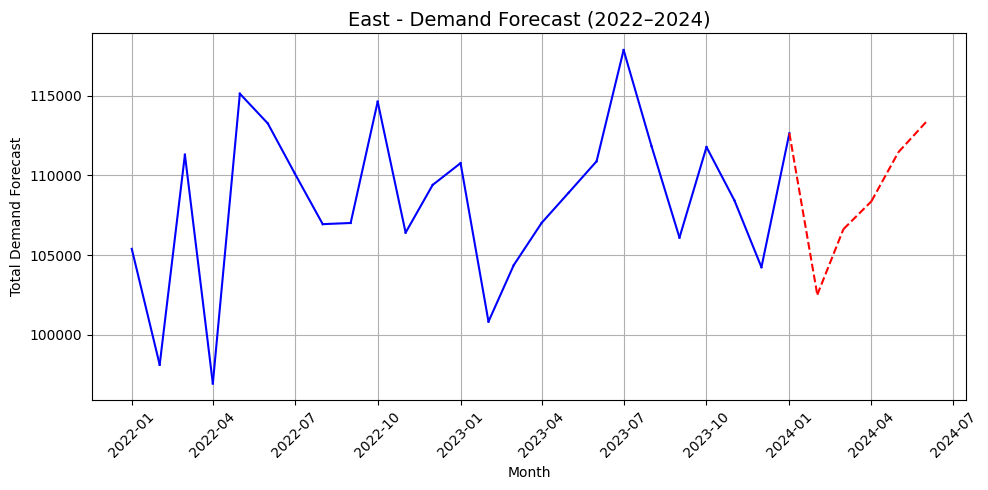

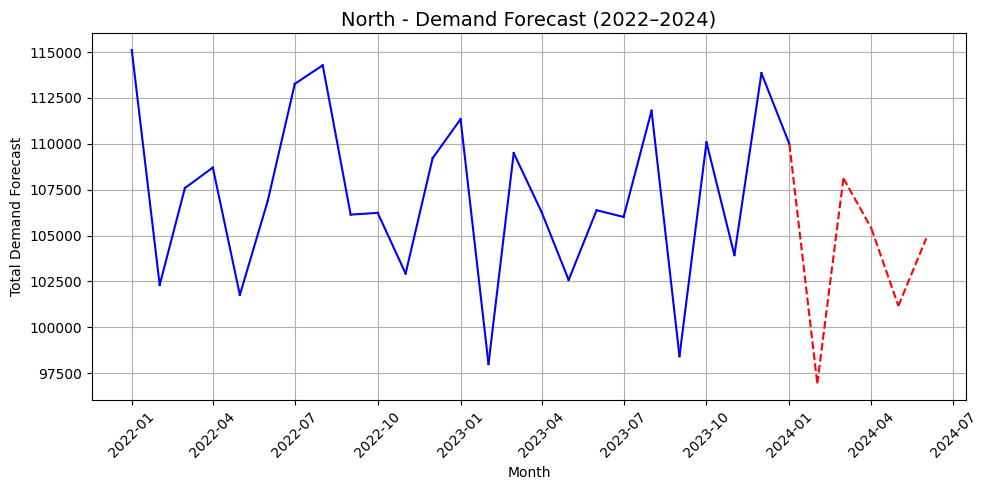

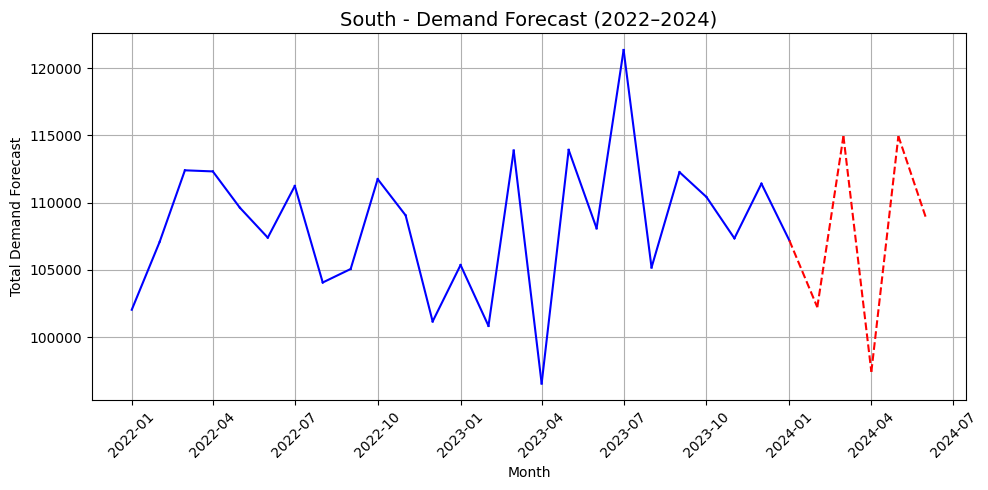

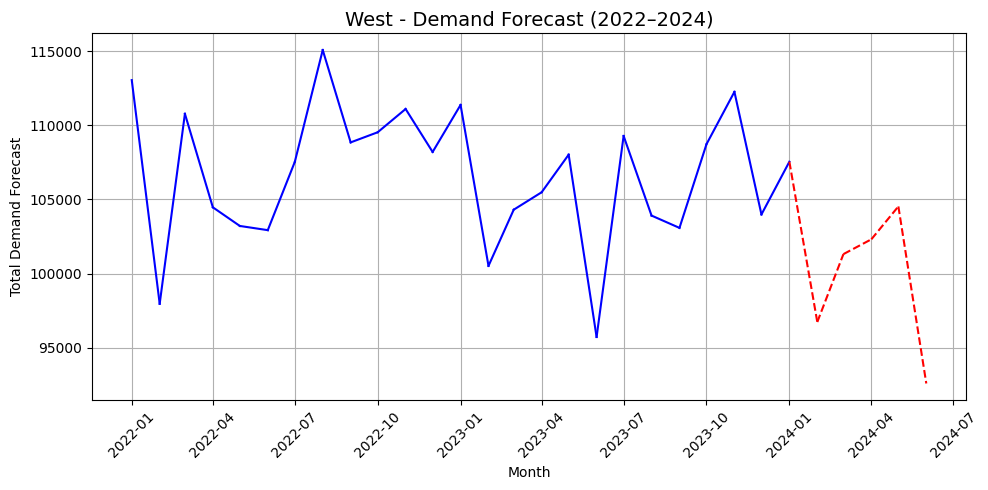

In [29]:

import matplotlib.pyplot as plt

# Ensure proper datetime format
final_plot['YearMonth'] = pd.to_datetime(final_plot['YearMonth'])

# Create separate plots for each region without any gap
for region in regions:
    region_data = final_plot[final_plot['Region'] == region].copy()
    region_data.sort_values('YearMonth', inplace=True)

    plt.figure(figsize=(10, 5))

    # Plot full line, but split on the fly by color & linestyle
    for i in range(len(region_data) - 1):
        x_vals = [region_data.iloc[i]['YearMonth'], region_data.iloc[i+1]['YearMonth']]
        y_vals = [region_data.iloc[i]['Demand Forecast'], region_data.iloc[i+1]['Demand Forecast']]
        current_date = region_data.iloc[i]['YearMonth']
        next_date = region_data.iloc[i+1]['YearMonth']
        linestyle = '--' if current_date >= pd.to_datetime('2024-01-01') else '-'
        color = 'red' if current_date >= pd.to_datetime('2024-01-01') else 'blue'

        plt.plot(x_vals, y_vals, linestyle=linestyle, color=color)

    plt.title(f"{region} - Demand Forecast (2022–2024)", fontsize=14)
    plt.xlabel("Month")
    plt.ylabel("Total Demand Forecast")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## Inference on Live Images (In-Memory)

To simulate real-time predictions, forecast graphs are generated in memory and passed directly to the model using `BytesIO`.

This allows us to evaluate classification performance on generated visual data without writing to disk.
